# Work On Hugging Face Dataset

In [30]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for visualization
from wordcloud import WordCloud # visualize description of this dataset


In [23]:
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_json("hf://datasets/yavuzyilmaz/cosmetic-ingredients/ingredients.json")

In [15]:
df.to_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\huggingface_dataset.csv", index=False)

df.head()


,ingredient,description
0,Glycerin,Glycerin doesn’t sound very glamorous but it i...
1,Butylene Glycol,"Butylene glycol, or let’s just call it BG, is ..."
2,Squalene,Squalene is an oily liquid that originally com...
3,Ceteareth-20,A common functional ingredient that helps to k...
4,Glyceryl Stearate,"A super common, waxy, white, solid stuff that ..."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ingredient   1020 non-null   object
 1   description  1020 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


In [13]:
df.describe()

,ingredient,description
count,1020,1020
unique,1013,1016
top,No Title,A type of oil soluble vitamin F that is used a...
freq,8,2


In [64]:
# remove ingredient with name no title
# huggingface_df = df[~((df["ingredient"] == "No Title"))]
huggingface_df = huggingface_df[~((huggingface_df['ingredient'] == "no title"))]

huggingface_df["ingredient"].value_counts()

ingredient
glycerin                                                1
butylene glycol                                         1
squalene                                                1
ceteareth-20                                            1
glyceryl stearate                                       1
                                                       ..
polyglyceryl-3 cetearyl ether olivate                   1
ci 77947                                                1
castor oil/​ipdi copolymer                              1
sericite m12 nll                                        1
maleated soybean oil glyceryl/​octyldodecanol esters    1
Name: count, Length: 1012, dtype: int64

In [20]:
df.describe()

,ingredient,description
count,1012,1012
unique,1012,1010
top,Glycerin,A type of oil soluble vitamin F that is used a...
freq,1,2


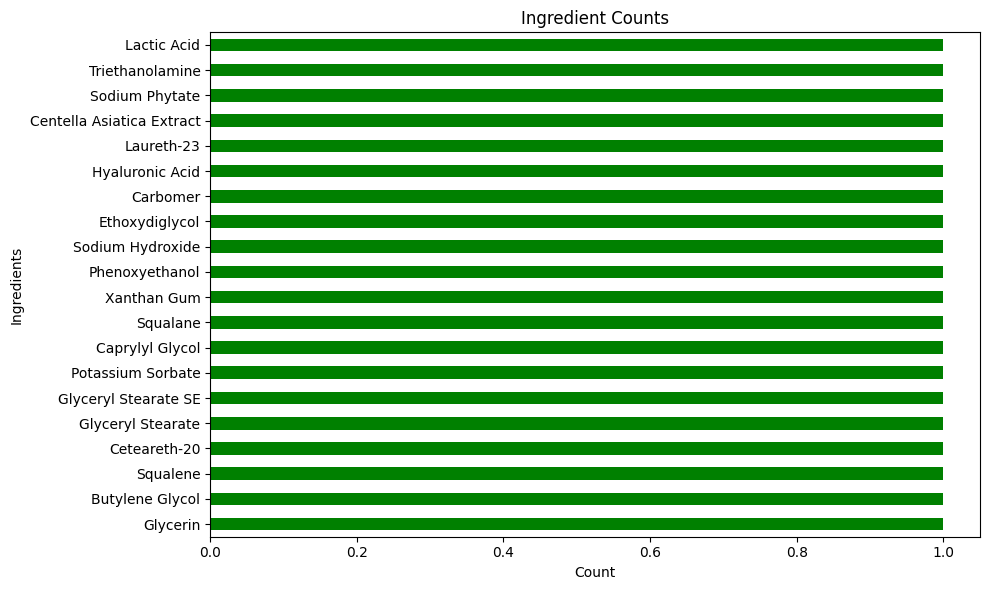

In [ ]:
# visual ingredient counts
# not important? since they're all 1 which make it look so ugly

# variable for ingredient count
ingredient_counts = df["ingredient"].value_counts()[:20]

# set figure size
plt.figure(figsize=(10,6))

# bar chart
ingredient_counts.plot(kind="barh", color="green")
plt.title("Ingredient Counts")
plt.xlabel("Count")
plt.ylabel("Ingredients")
plt.tight_layout()

So far, all ingredients are unique (count = 1) and have proper name

Text(0.5, 1.0, 'Word Cloud of Ingredient Descriptions')

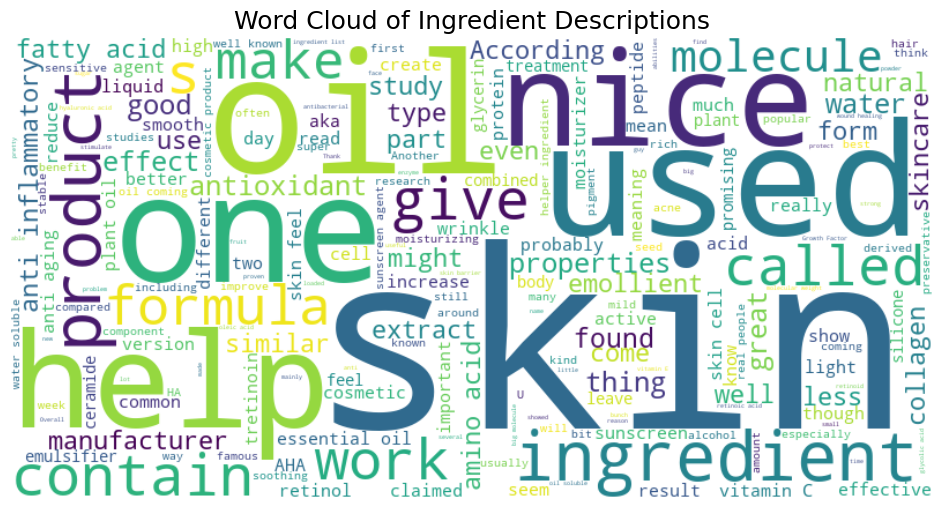

In [46]:
# combine descriptions into one string
text = ' '.join(df["description"].dropna())

# show frequent used words in the descriptions 
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Ingredient Descriptions", size=18)

From this (while some words are unecessary), we might say most of the descriptions about the ingredients in the dataset are positive => most ingredients might be safe?

since huggingface dataset will be used as safe ingredient, consider drop those ingredients that match with the CosIng dataset

In [50]:
cosing_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\cosing_data_cleaned.csv")

print("CosIng Columns:", cosing_df.columns.tolist())

CosIng Columns: ['Unnamed: 0', 'chemical name inn', 'sccs opinions', 'chemical iupac name', 'identified ingredient substance', 'cmr']


In [49]:
huggingface_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\huggingface_dataset.csv")

print("HuggingFace Columns:", huggingface_df.columns.tolist())

HuggingFace Columns: ['ingredient', 'description']


In [51]:
# standardize column names
cosing_df.rename(columns={'chemical name inn': 'ingredient'}, inplace=True)

print("Renamed CosIng Column:", cosing_df.columns.tolist())

Renamed CosIng Column: ['Unnamed: 0', 'ingredient', 'sccs opinions', 'chemical iupac name', 'identified ingredient substance', 'cmr']


In [54]:
# lowercase and strip whitespace
cosing_df['ingredient'] = cosing_df['ingredient'].str.lower().str.strip()
huggingface_df['ingredient'] = huggingface_df['ingredient'].str.lower().str.strip()

print("CosIng Ingredients:", cosing_df['ingredient'].tolist())
print("HuggingFace Ingredients:", huggingface_df['ingredient'].tolist())

CosIng Ingredients: ['n-(5-chlorobenzoxazol-2-yl)acetamide', '(2-acetoxyethyl)trimethylammonium hydroxide (acetylcholine) and its salts', 'deanol aceglumate (inn)', 'spironolactone (inn)', '[4-(4-hydroxy-3-iodophenoxy)-3,5-diiodophenyl]acetic acid (tiratricol (inn)) and its salts', 'methotrexate (inn)', 'aminocaproic acid (inn) and its salts', 'cinchophen (inn), its salts, derivatives and salts of these derivatives', 'thyropropic acid (inn) and its salts', 'trichloroacetic acid', 'aconitum napellus l. (leaves, roots and galenical preparations)', 'aconitine (principal alkaloid of aconitum napellus l.) and its salts', 'adonis vernalis l. and its preparations', 'epinephrine (inn)', 'rauwolfia serpentia l., alkaloids and their salts', 'alkyne alcohols, their esters, ethers and salts', 'isoprenaline (inn)', 'allyl isothiocyanate', 'alloclamide (inn) and its salts', 'nalorphine (inn), its salts and ethers', 'sympathicomimetic amines acting on the central nervous system: any substance contain

In [66]:
# set of unsafe keyword (manually tho i don't know howwww T^T)
cosing_kw = set()
for ing in cosing_df['ingredient']:
    parts = ing.replace("-", " ").replace(",", " ").split()
    for part in parts:
        if len(part) > 4: #avoid tiny fragments
            cosing_kw.add(part)

# manusal harmful substance
cosing_kw.update(["parabens", "phthalate", "formaldehyde", "triclosan"])

# check if any unsafe keyword appears in safe ingredients
def is_possibly_unsafe(safe_ingredient, unsafe_keywords):
    return any(kw in safe_ingredient for kw in unsafe_keywords)

# Apply the check
huggingface_df['possibly_unsafe'] = huggingface_df['ingredient'].apply(
    lambda x: is_possibly_unsafe(x, cosing_kw)
)

# drop the possibly unsafe
filtered_huggingface = huggingface_df[huggingface_df['possibly_unsafe'] == False].drop(columns=['possibly_unsafe'])

# now check
print("Original count:", len(huggingface_df))
print("Filtered count:", len(filtered_huggingface))

Original count: 1012
Filtered count: 437


In [67]:
print(filtered_huggingface['ingredient'])

0                       glycerin
2                       squalene
3                   ceteareth-20
4              glyceryl stearate
5           glyceryl stearate se
                  ...           
1004    palmitoyl hexapeptide-19
1008                  disiloxane
1009                anthocyanins
1014                    ci 77947
1016            sericite m12 nll
Name: ingredient, Length: 437, dtype: object


In [69]:
# save the filtered to csv
filtered_huggingface.to_csv(r"C:\Users\ASUS\OneDrive\KIT\Semester3\MachineLearningWithPython\ml_project2\datasets\filtered_huggingface.csv", index=False)